#Railway Fastener Detector

Install ultralytics


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 25.1 MB/s eta 0:00:00


Extract the zip file

In [ ]:
from google.colab import files
import zipfile
import os
# Extract the zip file
zip_file = "yolo.zip"
output_dir = "yolo_dataset"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Extracted files to {output_dir}")

Extracted files to yolo_dataset


Visualize images with labels

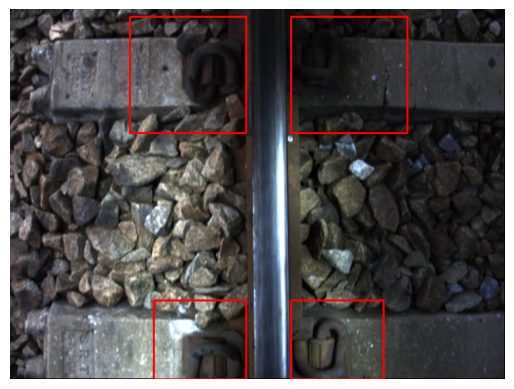

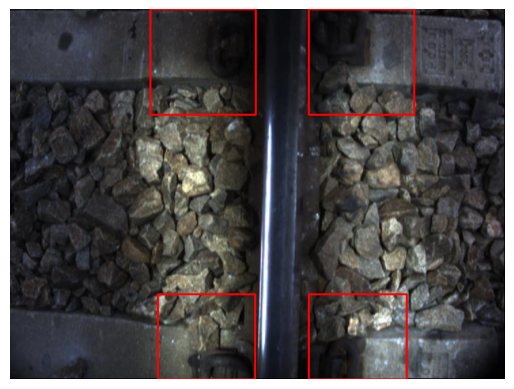

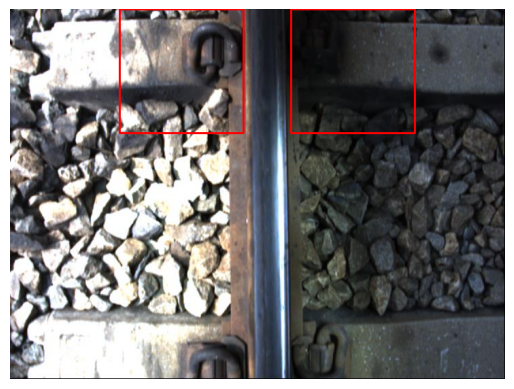

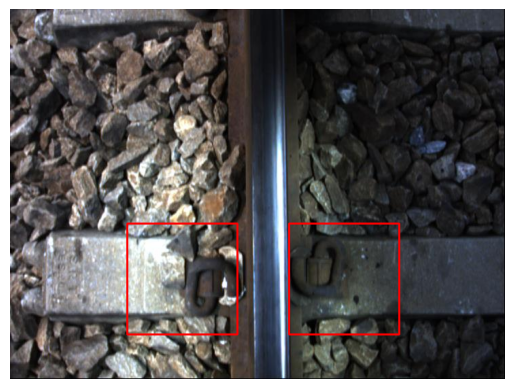

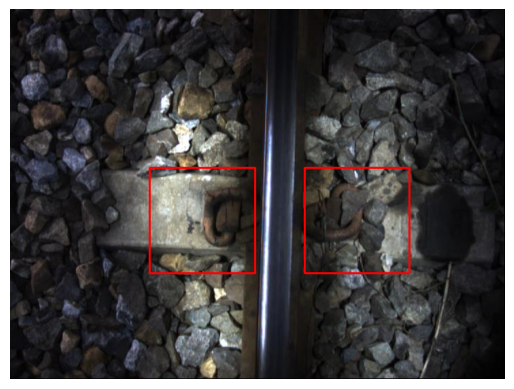

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob

# Set dataset path
dataset_dir = "yolo_dataset"

# Visualize images with labels
def visualize_yolo_dataset(images_path, labels_path, num_samples=5):
    image_files = glob.glob(os.path.join(images_path, "*.jpg"))
    selected_images = image_files[:num_samples]  # Select a few samples to visualize

    for img_path in selected_images:
        label_path = os.path.join(labels_path, os.path.basename(img_path).replace('.jpg', '.txt'))

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Load labels
        with open(label_path, "r") as f:
            for line in f:
                _, x, y, w, h = map(float, line.strip().split())

                # Denormalize coordinates
                img_h, img_w, _ = img.shape
                x1 = int((x - w / 2) * img_w)
                y1 = int((y - h / 2) * img_h)
                x2 = int((x + w / 2) * img_w)
                y2 = int((y + h / 2) * img_h)

                # Draw bounding box
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Show image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Visualize training dataset
visualize_yolo_dataset(os.path.join(dataset_dir, "train/images"),
                       os.path.join(dataset_dir, "train/labels"))

Define the dataset configuration

In [ ]:
import yaml


dataset_config = {
    "path": "/content/yolo_dataset",  # Path to your dataset
    "train": "train/images",  # Training images directory
    "val": "test/images",  # Validation images directory
    "names": {
        0: "fastener"  # Class names
    }
}

# Save the configuration to a YAML file
yaml_file = "dataset.yaml"

with open(yaml_file, "w") as file:
    yaml.dump(dataset_config, file, default_flow_style=False)

print(f"Dataset YAML file created at {yaml_file}")

Dataset YAML file created at dataset.yaml


Train model

In [ ]:

# Load YOLOv8 model
model = YOLO("yolov8s.pt")  # Pre-trained YOLOv8-small model

# Train the model
model.train(data="dataset.yaml", epochs=50, imgsz=640)

# Save the trained model
model_path = "yolov8s_trained.pt"
model.save(model_path)

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 755k/755k [00:00<00:00, 27.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 96.0MB/s]


AMP: checks passed ✅


train: Scanning /content/yolo_dataset/train/labels... 500 images, 5 backgrounds, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 1404.32it/s]

train: New cache created: /content/yolo_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolo_dataset/test/labels... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1184.94it/s]

val: New cache created: /content/yolo_dataset/test/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.08G      1.831      2.398      1.908         10        640: 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        100        223      0.969      0.883      0.948      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.09G      1.271      1.016      1.442         27        640: 100%|██████████| 32/32 [00:09<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        100        223      0.774      0.784      0.829      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.9G      1.245      0.865      1.409         23        640: 100%|██████████| 32/32 [00:10<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        100        223      0.884      0.785       0.88      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.03G      1.215     0.8073      1.396         26        640: 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100        223      0.873      0.892      0.932       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.04G      1.208     0.8559      1.403         11        640: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        100        223      0.946      0.915       0.95      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.04G      1.066     0.7141       1.29         27        640: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        100        223      0.914      0.907      0.952      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.04G      1.089     0.6829      1.323         19        640: 100%|██████████| 32/32 [00:09<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        100        223       0.94      0.933      0.968      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.05G      1.079     0.6763      1.295         15        640: 100%|██████████| 32/32 [00:15<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100        223      0.978      0.942      0.984      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.04G      1.031     0.6432      1.276         10        640: 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all        100        223      0.998      0.928      0.984      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.04G       1.02     0.6351      1.257         27        640: 100%|██████████| 32/32 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        100        223      0.981      0.943      0.965      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.04G      1.069     0.6551      1.308         13        640: 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        100        223      0.956      0.937      0.971      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.05G     0.9826      0.617       1.24         18        640: 100%|██████████| 32/32 [00:09<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        100        223      0.983      0.937       0.97      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.99G     0.9721     0.6019       1.24         13        640: 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all        100        223      0.968      0.941      0.986      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.04G     0.9638     0.5894      1.212         22        640: 100%|██████████| 32/32 [00:11<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100        223      0.988      0.937      0.982      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.04G     0.9659     0.5984      1.227         20        640: 100%|██████████| 32/32 [00:09<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        100        223       0.99      0.927      0.981      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.05G     0.9112     0.5743      1.192         22        640: 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        100        223      0.979      0.937      0.983      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.05G     0.9006     0.5715      1.195         16        640: 100%|██████████| 32/32 [00:11<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        100        223      0.965      0.942      0.975      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.04G      0.919     0.5825      1.207         16        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        100        223      0.964      0.937      0.983      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.05G     0.9301      0.594      1.211         16        640: 100%|██████████| 32/32 [00:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        100        223      0.964      0.951       0.98      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.99G      0.865     0.5543      1.175         15        640: 100%|██████████| 32/32 [00:09<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.40it/s]

                   all        100        223      0.992      0.942       0.99      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.04G     0.8861     0.5748      1.186         24        640: 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.12it/s]

                   all        100        223      0.987       0.96       0.99      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.03G     0.8286     0.5093      1.146         24        640: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        100        223      0.976      0.969      0.985      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         4G     0.8257     0.4868      1.143         20        640: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        100        223      0.974      0.964      0.984      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.04G     0.8026     0.5168      1.147         12        640: 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

                   all        100        223      0.985      0.951      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.04G     0.8166     0.4968      1.147         15        640: 100%|██████████| 32/32 [00:10<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]

                   all        100        223      0.977       0.96      0.983      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.04G     0.8013     0.5009      1.141         14        640: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100        223      0.985       0.96       0.98      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.02G      0.794     0.4833      1.122         23        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        100        223      0.979       0.96      0.977      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.03G     0.7554     0.4432       1.11         18        640: 100%|██████████| 32/32 [00:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.17it/s]

                   all        100        223      0.986      0.964      0.985      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.05G     0.7665     0.4878      1.119         17        640: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.24it/s]

                   all        100        223      0.991      0.941      0.982      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.04G      0.774     0.4822       1.12         18        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        100        223      0.977      0.964      0.987      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.04G     0.7638     0.4762        1.1         11        640: 100%|██████████| 32/32 [00:10<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        100        223      0.974      0.969      0.988      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.03G     0.7307     0.4452      1.087         20        640: 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]

                   all        100        223      0.985       0.96      0.989      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.07G      0.744     0.4485      1.098         18        640: 100%|██████████| 32/32 [00:10<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        100        223      0.989      0.964      0.984      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.04G     0.7278     0.4433       1.09         18        640: 100%|██████████| 32/32 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all        100        223      0.965      0.977      0.986      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.04G     0.7207     0.4387      1.094         10        640: 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        100        223      0.969      0.973      0.984      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.04G     0.7275     0.4346      1.084         14        640: 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        100        223      0.977       0.96      0.985      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.04G     0.7421     0.4426      1.086         10        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

                   all        100        223      0.977      0.963      0.985      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.04G     0.7223     0.4333      1.091         20        640: 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all        100        223      0.967      0.969      0.985      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.04G     0.7051     0.4205      1.078         20        640: 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]

                   all        100        223      0.973      0.982       0.99      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.04G     0.6801     0.4134      1.047         13        640: 100%|██████████| 32/32 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        100        223      0.991      0.958      0.986       0.81


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.02G     0.6453     0.3549      1.089          8        640: 100%|██████████| 32/32 [00:10<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        100        223      0.987       0.96      0.987      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.02G     0.6032      0.317      1.062          8        640: 100%|██████████| 32/32 [00:09<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.22it/s]

                   all        100        223      0.985       0.96      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.04G     0.5818     0.3114      1.041         10        640: 100%|██████████| 32/32 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all        100        223      0.947      0.982      0.988      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.04G     0.5686     0.3086      1.039          8        640: 100%|██████████| 32/32 [00:11<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.59it/s]

                   all        100        223      0.963      0.978      0.991      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.02G     0.5711     0.3019      1.032         10        640: 100%|██████████| 32/32 [00:09<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        100        223      0.969      0.975      0.991      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.02G     0.5389     0.2862       1.02          8        640: 100%|██████████| 32/32 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100        223       0.99       0.96       0.99      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.02G     0.5358     0.2755      1.017         10        640: 100%|██████████| 32/32 [00:10<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.52it/s]

                   all        100        223      0.989      0.964      0.989      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.02G     0.5474     0.2846      1.028         12        640: 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]

                   all        100        223      0.991      0.955      0.989      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.02G     0.5065     0.2712     0.9966         10        640: 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        100        223      0.965      0.976       0.99      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.02G     0.5046     0.2658     0.9952         10        640: 100%|██████████| 32/32 [00:09<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.76it/s]

                   all        100        223      0.986       0.96      0.988      0.834



50 epochs completed in 0.187 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


                   all        100        223      0.987       0.96      0.988      0.834
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train3


Evaluate the model on the test dataset

In [ ]:
metrics = model.val(data="dataset.yaml")
print(metrics)

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/yolo_dataset/test/labels.cache... 100 images, 1 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


                   all        100        223      0.986       0.96      0.988      0.833
Speed: 0.4ms preprocess, 9.0ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f91307faaa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03

Visualize predictions on test images


image 1/1 /content/yolo_dataset/test/images/637148611269791614_1.jpg: 480x640 (no detections), 16.6ms
Speed: 6.0ms preprocess, 16.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


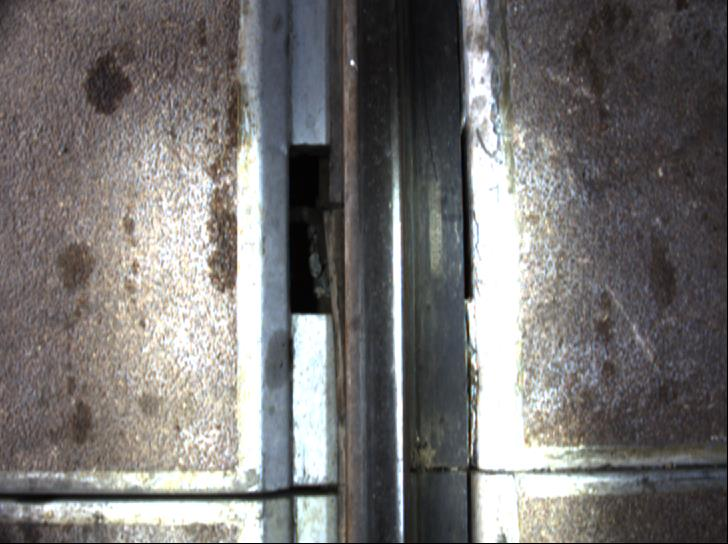


image 1/1 /content/yolo_dataset/test/images/637148602837100343_2.jpg: 480x640 2 fasteners, 13.3ms
Speed: 3.2ms preprocess, 13.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


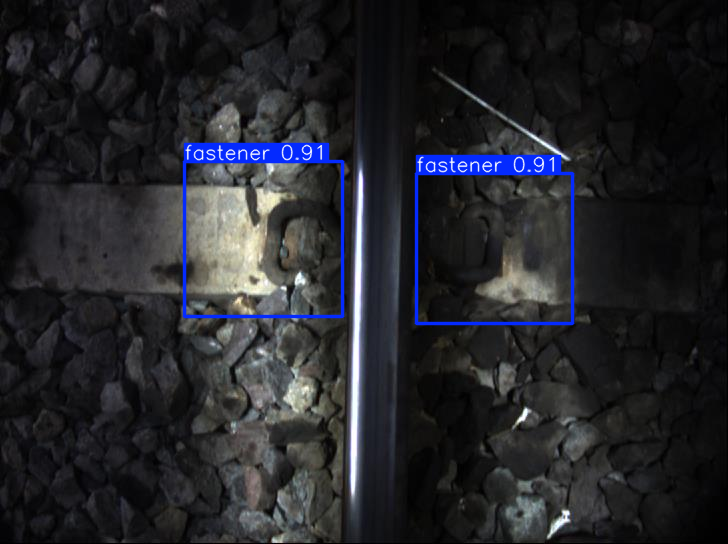


image 1/1 /content/yolo_dataset/test/images/637148607200861565_2.jpg: 480x640 2 fasteners, 17.2ms
Speed: 3.3ms preprocess, 17.2ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


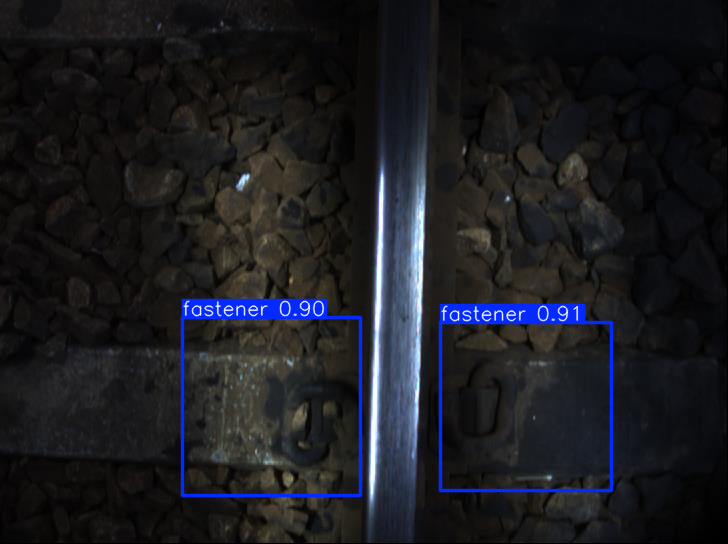


image 1/1 /content/yolo_dataset/test/images/637148613333909720_1.jpg: 480x640 2 fasteners, 13.3ms
Speed: 3.7ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


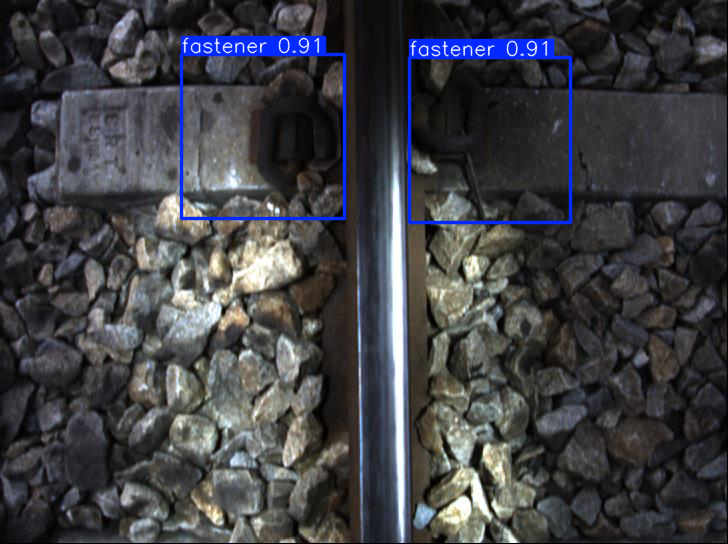


image 1/1 /content/yolo_dataset/test/images/637148613278681273_1.jpg: 480x640 2 fasteners, 14.4ms
Speed: 7.3ms preprocess, 14.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


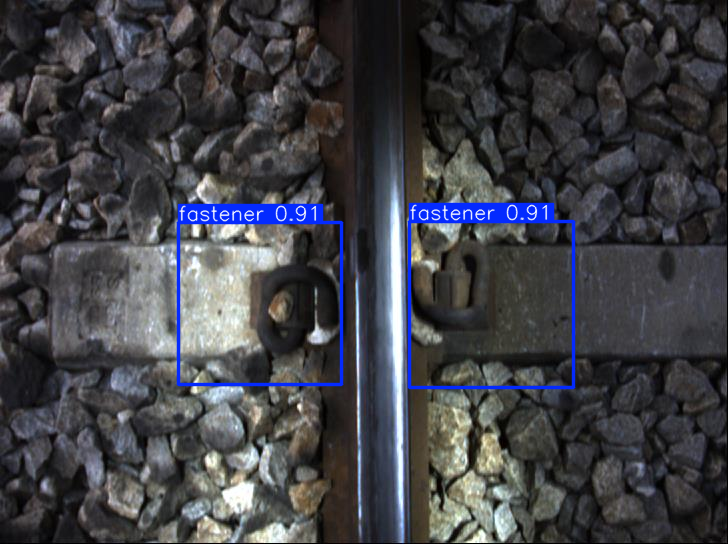

In [ ]:
test_images = glob.glob(os.path.join(dataset_dir, "test/images/*.jpg"))

for img_path in test_images[:5]:  # Visualize 5 test images
    results = model(img_path)
    results[0].show()